# Problem 1
Neural networks need tons of labelled data. The MNIST dataset of labelled handwritten digits is one of the
basic benchmarks to check the predictive power of a network. Here, we will load some of the data into a
Numpy array for further processing.

a) Unzipping the contents of mnist_test.zip into a folder called "data":

In [1]:
import os

In [2]:
!unzip -q mnist_test.zip -d data/

b) Creating a 1D Numpy array "labels" and read in all labels from "labels.txt":

In [3]:
import numpy as np

In [4]:
# Reading labels from labels.txt
labels_path = "data/labels.txt"
labels = np.loadtxt(labels_path, dtype=int)

c) Creating a 3D Numpy array "test" to represent the images:

In [5]:
n = 10000  # total number of images
test = np.empty((n, 28, 28), dtype=float)

d) Generating a list of all image names using list comprehension:

In [6]:
imgNames = [f"test_{str(i).zfill(len(str(n)))}.gif" for i in range(n)]

e) Iterating through all image files, loading the associated image file, converting it to a Numpy array, normalizing it, and storing it in "test":

In [7]:
from PIL import Image

for i, img_name in enumerate(imgNames):
    img_path = os.path.join("data", img_name)
    img = np.array(Image.open(img_path))

    # Normalizing the image
    img = img / 255.0

    test[i] = img


In [8]:
print(test)

[[[0.27843137 0.27843137 0.27843137 ... 0.27843137 0.27843137 0.27843137]
  [0.27843137 0.27843137 0.27843137 ... 0.27843137 0.27843137 0.27843137]
  [0.27843137 0.27843137 0.27843137 ... 0.27843137 0.27843137 0.27843137]
  ...
  [0.27843137 0.27843137 0.27843137 ... 0.27843137 0.27843137 0.27843137]
  [0.27843137 0.27843137 0.27843137 ... 0.27843137 0.27843137 0.27843137]
  [0.27843137 0.27843137 0.27843137 ... 0.27843137 0.27843137 0.27843137]]

 [[0.25882353 0.25882353 0.25882353 ... 0.25882353 0.25882353 0.25882353]
  [0.25882353 0.25882353 0.25882353 ... 0.25882353 0.25882353 0.25882353]
  [0.25882353 0.25882353 0.25882353 ... 0.25882353 0.25882353 0.25882353]
  ...
  [0.25882353 0.25882353 0.25882353 ... 0.25882353 0.25882353 0.25882353]
  [0.25882353 0.25882353 0.25882353 ... 0.25882353 0.25882353 0.25882353]
  [0.25882353 0.25882353 0.25882353 ... 0.25882353 0.25882353 0.25882353]]

 [[0.19215686 0.19215686 0.19215686 ... 0.19215686 0.19215686 0.19215686]
  [0.19215686 0.192156

# Problem 2
Thanks to Pillow, a few lines of code suffice to get handwritten stuff into your notebook.

Task **2a.** was carried out outside the notebook using Microsoft Paint.

b) Loading the hand-drawn number and resizing it to 28 x 28 pixels

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [10]:
img = Image.open("eight.gif").convert('L')
imgSize = 28
imgRe = img.resize(size=(imgSize, imgSize))
img = np.array(img) 

c) Generating a single plot of five MNIST images of my digit

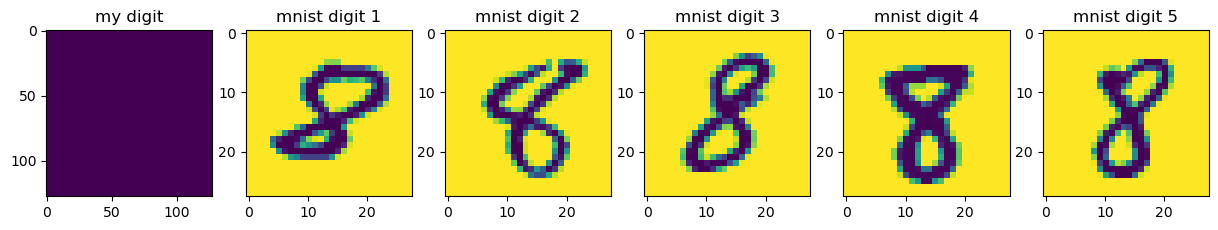

In [11]:
mnist_images = []
mnist_images.append(Image.open("data/test_00061.gif").convert('L'))
mnist_images.append(Image.open("data/test_00084.gif").convert('L'))
mnist_images.append(Image.open("data/test_00110.gif").convert('L'))
mnist_images.append(Image.open("data/test_00128.gif").convert('L'))
mnist_images.append(Image.open("data/test_00134.gif").convert('L'))

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

axes[0].imshow(img)#, cmap='gray')
axes[0].set_title('my digit')

for i, image in zip(range(len(mnist_images)), mnist_images):
    image = image.resize(size=(imgSize, imgSize))
    axes[i+1].imshow(np.array(image))#, cmap='gray')
    axes[i+1].set_title(f'mnist digit {i+1}')

plt.show()

# Problem 3
In the lecture, we have established the foundation of a neural network class neuralNetwork which will be
extended method by method throughout the next weeks before we switch to Tensorflow.

a) Copying all the code that is required to create an instance of the class neuralNetwork.

In [12]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

class neuralNetwork:
    def __init__(self, iNodes, hNodes, oNodes, lRate):
        # Number of input, hidden and output nodes
        self.iNodes = iNodes
        self.hNodes = hNodes
        self.oNodes = oNodes  
        # Weight matrices, wih and who, initialized with random numbers that follow a normal distribution
        self.wih = np.random.normal(0.0, 0.5, (self.hNodes,self.iNodes))
        self.who = np.random.normal(0.0, 0.5, (self.oNodes,self.hNodes))   
        # Learning rate (for session 7)
        self.lRate = lRate
        # Activation function is the sigmoid function
        self.actFunc = sigmoid
    
    def __str__(self):
        return f"Input nodes: {self.iNodes}, Hidden nodes: {self.hNodes}, Output nodes: {self.oNodes}, Learning rate: {self.lRate}, wih matrix shape: {self.wih.shape}, who matrix shape: {self.who.shape}"
        
    def query(self, imgArr):
        # Transform the image into a vector    
        inputs = imgArr.flatten()
        # Move signal into hidden layer
        hiddenInputs = np.dot(self.wih, inputs)
        # Apply the activation function
        hiddenOutputs = self.actFunc(hiddenInputs)
        # Move signal into output layer
        outputs = np.dot(self.who, hiddenOutputs)
        # Apply the activation function
        prediction = self.actFunc(outputs)
        return prediction 

b) Writing a function `softmax(arr)` that applies the softmax operation to a Numpy array:

In [13]:
def softmax(arr):
    exp_arr = np.exp(arr - np.max(arr))  # Subtracting max for numerical stability
    return exp_arr / exp_arr.sum()

c) Using the network’s query method to feed my handwritten digit into the network. 

In [14]:
iNodes = 16384
hNodes = 100
oNodes = 10 
lRate = 0.1  

In [15]:
handwritten_digit = img / 255.0
nn = neuralNetwork(iNodes, hNodes, oNodes, lRate)
output_vector = nn.query(handwritten_digit)
softmax_output = softmax(output_vector)

print("Sum of entries in softmax_output:", np.sum(softmax_output))

Sum of entries in softmax_output: 1.0


Verified. The sum of its entries equals 1.